<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/resist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import networkx as nx
n = 70
G1 = nx.connected_watts_strogatz_graph(n, 2, 0.3) 
m = G1.number_of_edges()
m

70

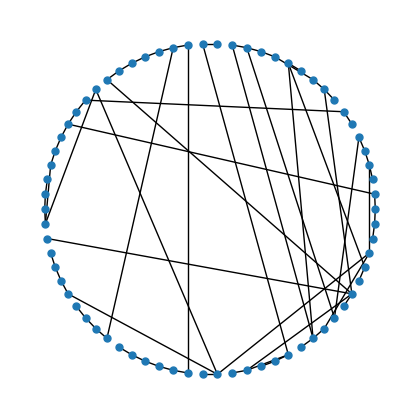

In [97]:
L1 = nx.circular_layout(G1)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G1, L1, node_size = 25)

In [98]:
from random import sample
pair = sample(G1.nodes, 2)
source = pair[0]
target = pair[1]
print(pair, 0 in G1.nodes, n in G1.nodes)

[15, 58] True False


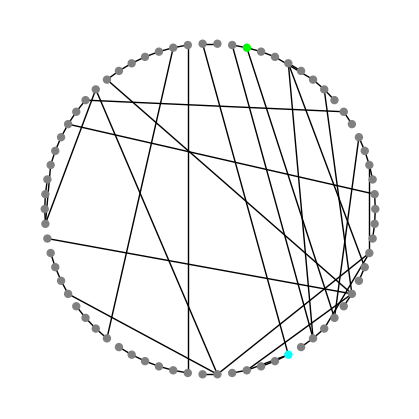

In [99]:
colors = [ 'gray' ] * n
colors[source] = 'lime'
colors[target] = 'cyan'
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G1, L1, node_size = 25, node_color = colors)

In [100]:
path = nx.dijkstra_path(G1, source, target)
path

[15, 14, 13, 10, 9, 64, 55, 58]

In [101]:
P = []
current = path[0]
for pos in range(1, len(path)):
  following = path[pos]
  P.append((current, following))
  current = following
P

[(15, 14), (14, 13), (13, 10), (10, 9), (9, 64), (64, 55), (55, 58)]

In [102]:
E1 = set(P) 
E2 = set([ (v, u) for (u, v) in P ])
E = E1 | E2
E

{(9, 10),
 (9, 64),
 (10, 9),
 (10, 13),
 (13, 10),
 (13, 14),
 (14, 13),
 (14, 15),
 (15, 14),
 (55, 58),
 (55, 64),
 (58, 55),
 (64, 9),
 (64, 55)}

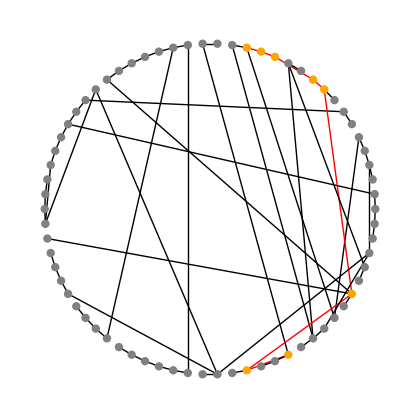

In [103]:
for v in path:
  colors[v] = 'orange'

Ec = [ 'red' if (v, u) in E else 'black' for v, u in G1.edges ]

fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G1, L1, node_size = 25, node_color = colors, edge_color = Ec)

In [108]:
distance = nx.floyd_warshall(G1)
distance[source][target]

7.0

In [110]:
total = 0
for v in G1:
    for u in G1:
        if v != u:
          total += distance[v][u]
count = n**2 - n
print(total / count)

11.676604554865424


In [107]:
nx.average_shortest_path_length(G1)

11.676604554865424

In [113]:
from random import choice

while True:
  broken = choice(list(G1.nodes))
  G1.remove_node(broken)
  nNow = G1.number_of_nodes()
  mNow = G1.number_of_edges()
  print(f'{nNow} vertices, down from {n}')
  print(f'{mNow} edges, down from {m}')
  comp = [ cc for cc in nx.connected_components(G1) ]
  if len(comp) > 1: # it broke into pieces
    break
    avgd = nx.average_shortest_path_length(G1)
  print(f'Avg distance now at {avgd:.2f}')

68 vertices, down from 70
63 edges, down from 70


In [95]:
for cc in comp:
  print(len(cc))

63
6


In [160]:
n = 70
G2 = nx.connected_watts_strogatz_graph(n, 4, 0.3) 
G2.number_of_edges()

140

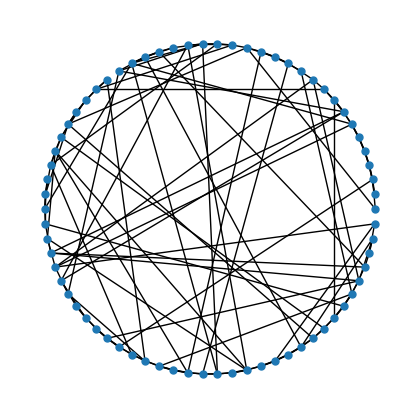

In [161]:
L2 = nx.circular_layout(G2) # we will not see most of the KNN edges
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G2, L2, node_size = 25)

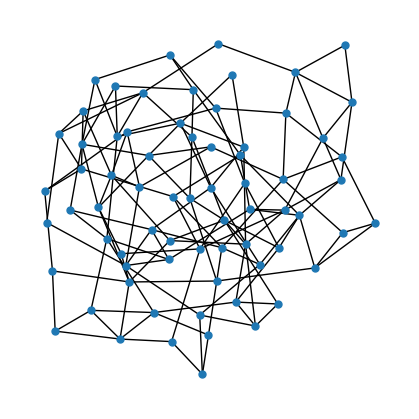

In [162]:
L2 = nx.kamada_kawai_layout(G2)
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G2, L2, node_size = 25)

In [193]:
percolated = G2.copy()
ccc = [ 'blue', 'red', 'purple', 'orange', 'lime', 'gold', 'hotpink', 'cornflowerblue', 'black' ] # the last one is default if we run out
fade = set()

def start():
  nx.draw(G2, L2, node_size = 25)

def percolate(t):
  global percolated, fade
  comp = [ cc for cc in nx.connected_components(percolated) ]
  if len(comp) == 1: # still in one piece
    print(nx.average_shortest_path_length(percolated))
  # color the components (on the original graph)
  Vc = [ 'lightgray' for v in G2.nodes ] # grayed out is default
  i = 0 # start with the first color
  for cc in comp: # iterate over the components that are present
    compColor = ccc[i]
    for v in cc: # for each vertex in that component
      Vc[v] = ccc[i]
    if i < len(ccc) - 1: # if there are more colors available
      i += 1 # change to the next color
  if percolated.number_of_nodes() > 1:
    v = choice(list(percolated.nodes))
    Vc[v] = 'lightgray' # fade out
    for u in G2.neighbors(v):
      fade.add((u, v))
      fade.add((v, u))
    percolated.remove_node(v)
  Ec = [ 'lightgray' if e in fade else 'black' for e in G2.edges() ]
  plt.clf()
  nx.draw(G2, L2, node_size = 25, node_color = Vc, edge_color = Ec)

3.3590062111801244
3.4279624893435634
3.4482001755926253
3.480325644504749
3.523076923076923
3.5572115384615386
3.5654761904761907
3.585253456221198
3.6255949233209943
3.585792349726776
3.574576271186441
3.619520748100526
3.5831820931639444
3.7211779448621556
3.6902597402597404
3.816161616161616
3.8609364081062196
3.8751814223512335
3.944947209653092
4.169411764705882


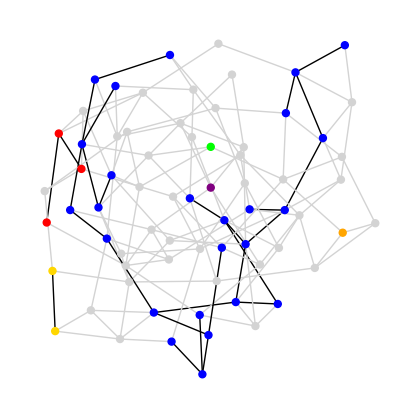

In [194]:
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

duration = n // 2 # take half of them away
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
animation.FuncAnimation(fig, percolate, frames = duration, repeat = False, init_func = start())